# 전세가격지수

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from matplotlib import rcParams
plt.rcParams['font.family'] = 'Gulim'

# 데이터 전처리

## 데이터 탐색

In [22]:
df = pd.read_excel('./data_anal_proj/주간 아파트 전세가격지수_20241026.xlsx').T #전치
# 기준시점 = 2022년 1월 10일

In [23]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,268,269,270,271,272,273,274,275,276,277
지역명,전국,서울,강북14개구,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,...,익산시,정읍시,남원시,김제시,완주군,무주군,임실군,순창군,고창군,부안군
2022-10-24 00:00:52,99.3345,98.986567,99.076653,100.130635,98.870586,99.679785,99.362464,98.883386,98.580461,100.06476,...,102.776023,-,-,-,-,-,-,-,-,-
2022-10-31 00:00:52,99.026016,98.577326,98.631199,100.09141,98.686393,99.251385,98.800505,98.25197,98.162835,100.06476,...,102.776023,-,-,-,-,-,-,-,-,-


## 필요한 데이터만 추출

In [24]:
df_seoul = df.drop(df.columns[29:], axis=1) # 서울 외 지역 칼럼에서 제외
df_seoul.head(3)

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
지역명,전국,서울,강북14개구,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
2022-10-24 00:00:52,99.3345,98.986567,99.076653,100.130635,98.870586,99.679785,99.362464,98.883386,98.580461,100.06476,...,100.255155,98.205311,100.054932,102.911937,99.92406,98.542718,99.318387,98.326616,96.416221,98.769335
2022-10-31 00:00:52,99.026016,98.577326,98.631199,100.09141,98.686393,99.251385,98.800505,98.25197,98.162835,100.06476,...,99.869813,97.768982,99.91454,102.701387,99.654276,97.966362,99.11042,98.238064,95.733002,98.525683


In [25]:
df_seoul.columns = seoul_columns #칼럼 다시 세팅
df_seoul = df_seoul.iloc[1:]
df_seoul.head(3)

,전국,서울,강북14개구,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
2022-10-24 00:00:52,99.3345,98.986567,99.076653,100.130635,98.870586,99.679785,99.362464,98.883386,98.580461,100.06476,...,100.255155,98.205311,100.054932,102.911937,99.92406,98.542718,99.318387,98.326616,96.416221,98.769335
2022-10-31 00:00:52,99.026016,98.577326,98.631199,100.09141,98.686393,99.251385,98.800505,98.25197,98.162835,100.06476,...,99.869813,97.768982,99.91454,102.701387,99.654276,97.966362,99.11042,98.238064,95.733002,98.525683
2022-11-07 00:00:52,98.623536,98.043303,98.203469,100.062392,98.649147,98.845319,98.12847,98.057107,97.057822,99.954878,...,98.503879,97.001297,99.543879,102.641266,98.980901,97.681083,98.419544,98.044132,94.612522,97.947095


## 이상치 처리

In [27]:
df_seoul.index.get_indexer(['2024.01.01']) #예외 행의 인덱스값 확인

array([60], dtype=int64)

In [28]:
df_seoul.isnull().sum().sum() #결측치 개수 확인

0

In [29]:
df_seoul.index #행이름 예외 발견

Index([2022-10-24 00:00:52, 2022-10-31 00:00:52, 2022-11-07 00:00:52,
       2022-11-14 00:00:52, 2022-11-21 00:00:52, 2022-11-28 00:00:52,
       2022-12-05 00:00:52, 2022-12-12 00:00:52, 2022-12-19 00:00:52,
       2022-12-26 00:00:52,
       ...
       2024-08-12 00:00:52, 2024-08-19 00:00:52, 2024-08-26 00:00:52,
       2024-09-02 00:00:52, 2024-09-09 00:00:52, 2024-09-23 00:00:52,
       2024-09-30 00:00:52, 2024-10-07 00:00:52, 2024-10-14 00:00:52,
       2024-10-21 00:00:52],
      dtype='object', length=101)

In [30]:
df_seoul.index.get_indexer(['2024.01.01']) #예외 행의 인덱스값 확인

array([60], dtype=int64)

In [31]:
df_seoul = df_seoul.drop( df_seoul.index[60] ) #예외 행 지우기

## 파일로 저장

In [19]:
df_seoul.to_csv('data_jeonse.csv', index=False)

## 시각화

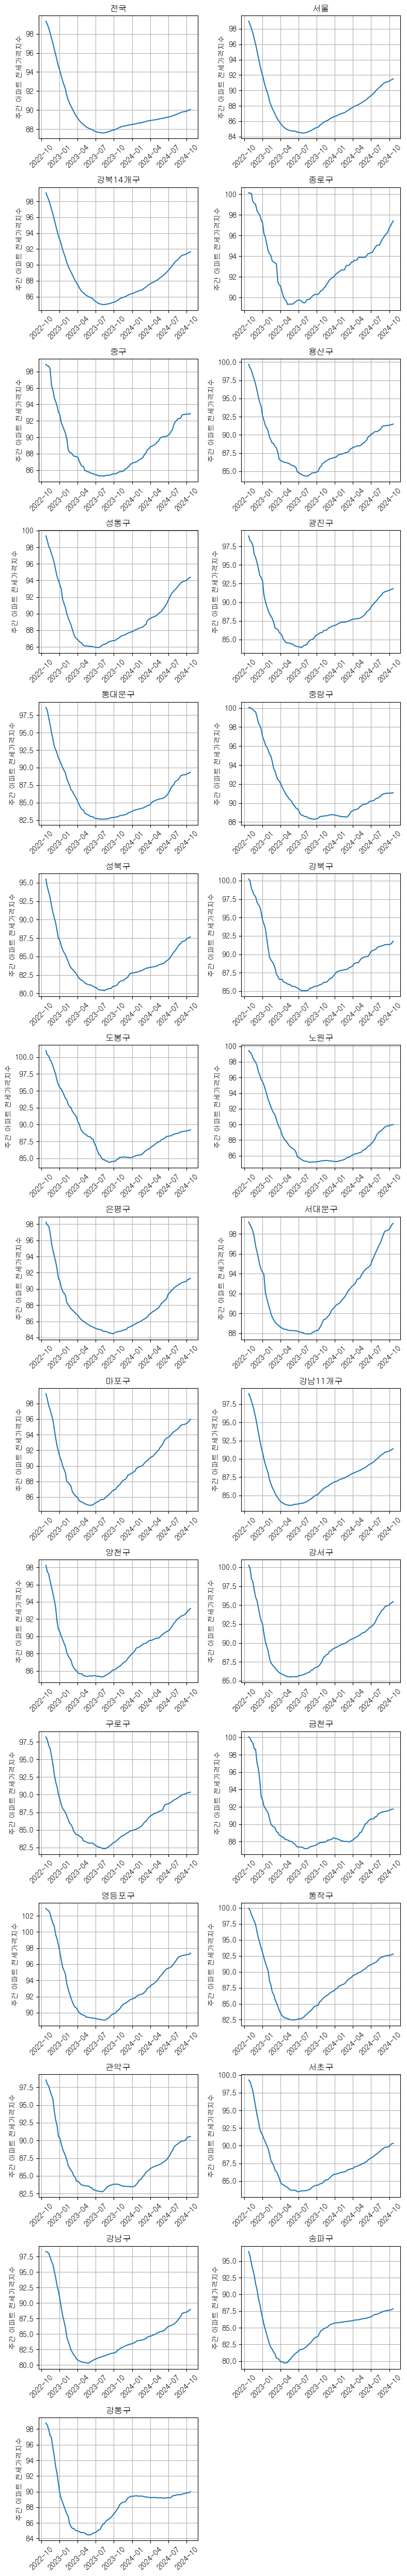

In [18]:
fig = plt.figure(figsize=(8,50))
i = 1

num_plots = len(seoul_columns)
rows = (num_plots // 2) + 1  # 2열로 나눌 경우 필요한 행 수 계산

for gu in seoul_columns:
    plt.subplot(rows,2,i)
    plt.plot(df_seoul.index, df_seoul[gu])
    plt.title(gu)
    plt.ylabel('주간 아파트 전세가격지수')
    
    plt.xticks(rotation=45)  # x축 레이블 회전
    plt.grid()  # 그리드 추가
    i += 1
    
plt.tight_layout()  # 레이아웃 조정
plt.show()

# 데이터 분석

In [ ]:
일반적으로 전세지수가 매매지수를 따라가는 추세를 보임.